# Session 7: data analysis
- sample project
- twitter data
- more data: mobility

### project lists
- stocks
- online classes and quality
- retail
- crime
  

In [4]:
# import as needed
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## twitter data
- filename: 2020-07-06_top1000bigrams.csv

In [29]:
# read a file and show detail
#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
tw = pd.read_csv('../sample-code/data/covid-term/2020-05-03_top1000terms.csv', header=None,names=['term','frequency'])
print(tw.head(50))

#get entry for ketword 'covid'
a=tw[tw['term']=='covid']
print('a=\n',a)
b=a.set_index(pd.Index(range(a.shape[0])))  #reset the index
b.loc[0,'freqency']
print('b=\n',b)


               term  frequency
0       coronavirus     328383
1             covid     203800
2                19     193076
3           covid19     167520
4               NaN      62057
5            people      46485
6               amp      44220
7             cases      39189
8               new      38259
9               via      35970
10            trump      35641
11               us      35339
12         pandemic      32337
13           deaths      30309
14            virus      28311
15            china      25257
16             news      24841
17         lockdown      24658
18             like      23712
19              one      21695
20              000      21681
21              get      21323
22              may      20165
23            world      19933
24  realdonaldtrump      19843
25             time      18864
26            death      18346
27             2020      17171
28           health      17121
29             know      17103
30               di      16969
31      

KeyError: 'freqency'

In [9]:
# read all files and plot some information
t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
keywords=['covid']
#keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
#keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

df = DataFrame(index=t_range)             #a DataFrame to save selected data
folder='../sample-code/data/covid-term/'  #folder with the data files

#loop through each day
for d in t_range:
    filename=folder + str(d)[:10] + '_top1000terms.csv'
    #print('filename --> ',filename)
    tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
    for key in keywords:
        tw_short=tw[tw['term']==key]
        if tw_short.shape[0]==0:   #check if the key exists or not
            f=0
        else:                      #sometimes there are two duplicates for the entry, not sure why
            tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
            f=tw_short2.loc[0,'frequency']
        df.loc[d,key]=f
    

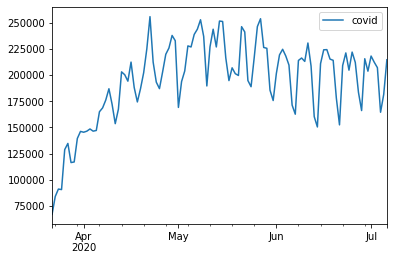

In [10]:
df.plot()

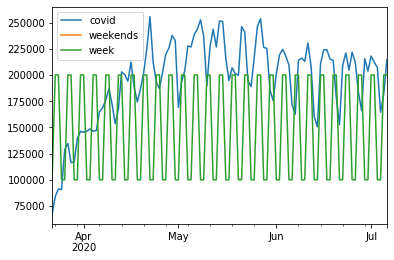

In [26]:
# trying to find the relation between 'covid' tweets and weekends.
# 2020-03-22 is sunday
weekdays=200000
weekends=100000
flag=7
for d in t_range:
    if ( flag < 5 ):
        #weekdays
        df.loc[d,'week']=weekdays
    else:
        #weekends
        df.loc[d,'week']=weekends
    flag +=2
    if (flag > 7):
        flag = 1
df.plot()

### More to do
- check the frequency with weekdays and weekends
- check degree of anxiety from the keywords, and relate to daily new cases